# 仮説検定

## Section 9 統計的仮説検定

例 薬Aと薬Bで効果の差はあるか

- 帰無仮説
  - 薬AとBで差はない (←棄却することを狙っている)。統計的に差があると言えれば棄却する。言えなければ採択する

- 対立仮説
  - 薬AとBで差はある (←成立することを狙っている）。帰無仮説を棄却できれば対立仮説が成立する。

なぜ？
- 「差がある」にはさまざまなケースがある。差にもいろんなケースがある
- 「差がある」ことを言うために、「差がない」と言う１つの仮説のみを否定すれば良い。


検定の流れ
1. 帰無仮説と対立仮説を立てる
2. 帰無仮説が正しいと家庭のもと、標本観察を行う(標本統計量を計算する)
3. 標本観察の結果、帰無仮説を否定できるかを確認する（否定した場合、対立仮説が成立）


## Section 10 比率差の検定

- 標本の背後にある母集団の比率を検定する
- 「成立させたい仮説」を対立仮説に選ぶこと。片側検定(<, >などを確認)、両側検定がある
- 帰無仮説が正しいと仮定のもと、標本観察を行う。
  - 二つの標本から比率を計算し、**比率の差がどのような標本分布になるか**を考える
  - 帰無仮説が正しいとした場合、得られた比率の差がどれくらいの確率で選べるかを確認する

### 比率の標本分布

- まずそれぞぞれの比率の標本分布を考える
- クリック数x, 閲覧数nとすると、クリック率x/nは平均p, 分散 pq/nの正規分布に従う（ただしpは母比率、q=1-p）
- 比率の差

$$
\frac{x_1}{n_1} - \frac{x_2}{n_2}
$$

標本分布: 平均は二つの確率変数の差の、平均値はそれぞれの平均の差、分散はそれぞれの標本分布の分散の和

- 平均: $p_1-p_2$
- 分散: $\frac{p1q1}{n1} + \frac{p2q2}{n2}$　= $\frac{p1(1-q1)}{n1} + \frac{p2(1-q2)}{n2}$
- 標準偏差: $\sqrt{\frac{p1(1-p1)}{n1}+\frac{p2(1-p2)}{n2}}$

帰無仮説（p1 = p2 ）が正しいと仮定すると、比率差 $\frac{x_1}{n_1} - \frac{x_2}{n_2}$の標本分布は、
- 平均: 0
- 標準偏差: $\sqrt{p(1-p)(\frac{1}{n1}+\frac{1}{n2})}$

### 有意水準と両/片側検定

- 帰無仮説を正しいとすると滅多に起きない確率の基準を有意水準という。
- 通常は $\alpha=.05$　または　$\alpha=.01$
- 検定統計量が有意水準以下の確率で得られる場合、帰無仮説を棄却し、「統計的に有意である」
- 有意水準 .05の場合
  - 両側検定 : 下側2.5%, 上側2.5% が棄却域
  - 片側検定(上側): 上側 5%
  - 片側検定(下側): 下側 5%
- 標準化して考える。平均(0)を引いて、標準偏差($\sqrt{p(1-p)(\frac{1}{n1}+\frac{1}{n2})}$)で割る

$$
z = \frac{\frac{x_1}{n_1} - \frac{x_2}{n_2}}{\sqrt{p(1-p)(\frac{1}{n1}+\frac{1}{n2})}}
$$

- 有意水準5%の両側検定の場合、zの値が、-1.96以下、または1.96以上であれば、棄却域となり、帰無仮説を棄却する


### 母集団 pの推定値 $\hat{p}$

帰無仮説を正しいとするため、二つの標本を合わせた比率を母比率pの推定値 $\hat{p}$ とする  
p1 = 30/1000  
p2 = 33/1000の場合、  
 $\hat{p} = \frac{30+33}{1000+1000} = 63/2000$
 
有意水準5%片側検定の場合、棄却域は<-1.64 または +1.64<.

### p値

帰無仮説が正しいとした場合に、その統計検定量が得られる確率をp値という。
pが有意水準（例:5%)よりも小さいかどうかが重要。

#### 比率差の検定まとめ

1. 標本を無作為抽出する
2. 帰無仮説と対立仮説を立てる
3. 帰無仮説の下で比率差の標本分布を求める
4. 母比率pの推定値 $\hat{p}$ を求める
5. 標準化したzを計算する(z分布： 標準正規分布）
6. zが棄却域に入るかを見る

## 比率差の検定(Z-TEST)

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
import matplotlib.pyplot as plt
%matplotlib inline

自社のサイトの改善により、クリック率が30/1000から33/1000に上がった。
クリック率が上がったかどうかを確かめたい。

In [15]:
proportions_ztest([30,33], [1000,1000], alternative='smaller')
# z: -0.38 (>-1.64)
# p値: 0.35 (>0.05)
# 帰無仮説を棄却できない

(-0.3840618481549573, 0.35046630388746547)

## Section 10: 連関の検定（カイ二乗検定）

- ２つのカテゴリー変数間の連関があるかを検定する
- 帰無仮説には「連関がない（＝独立）」
- 対立仮説には「連関がある（＝独立ではない）」
- 観測度数が期待度数からどれくらい離れているかを計算する$x^2$ (カイ二乗）

$$
x^2 = \sum_{i=1}^a \sum_{j=1}^b \frac{(n_{ij}-e_{ij})^2}{e_{ij}}
$$

a行b列の分割表におけるi行j列の観測度数が $n_{ij}$, 期待度数が　$e_{ij}$ とする  
独立なら0となる  
$x^2$は$x^2$二乗分布に従う　　

### カイ二乗分布

- $x^2$ 値が従う確率分布
- 自由度(degree of freedom)を唯一のパラメータにとる分布
- 自由度=(a-1)(b-1) (a行b列の分割表)

自由度とは、自由に値を決められる数。たとえば２つの値をとるカテゴリ変数は、１つ決まれば、もう１つは決まってしまう（自由度：１）


### カイ二乗分布のp値

- 帰無仮説が正しいとした場合の標本から計算された $x^2$ が得られる確率
- ２変数が独立の関係にある場合は、 $x^2$ = 0 になり、この時、 p=1
- $x^2$分布の右から確率を累積した値（右側の**面積**）
- 常に上側の棄却域しかない。
- 例: 自由度1の $x^2$ 値の有意水準5%は $x^2$=3.841

たとえばお酒を飲む/飲まないとタバコ吸う/吸わないの x^2=24.11で求めたp=9e^0-7の場合、棄却域に入り帰無仮説は棄却される。  
よって連関はある、と言える

### 連関の検定(カイ二乗検定）まとめ

1. 標本を無作為に抽出する（もしくは母集団の設定）
2. 帰無仮説と対立仮説、および有意水準を立てる
3. 検定統計量 $x^2$ を求める
4. 計算した $x^2$ が、$x^2$分布で棄却域に入るかを確認する。
  - 上側を見るので、2x2の分割表(2-1)*(2-1)=自由度1の $x^2$ 分布における有意水準5%の棄却域は $x^2$ > 3.841. 
  - 今回の $x^2$ は棄却域に入るため、帰無仮説を棄却し、対立仮説を成立させることができる
  - 結論: 飲酒と喫煙の行動に連関はあるといえる (p<.05)

In [16]:
# chi2, p, dof, ex = stats.chi2_contingency(obs, correction=False)
# obs: observation (観測度数）)
# correction: イエイエツの修正. default ではTrue

obs = [[15,5],[15,65]]
stats.chi2_contingency(obs, correction=False)

(24.107142857142858,
 9.112167294252327e-07,
 1,
 array([[ 6., 14.],
        [24., 56.]]))

- 24.10：$x^2$値
- 9.11e-7 : p (<.05)
- 1: Dof
- expectation

#### イエイエツの修正は通常はあまりかけない

- p値が高くなるため、本当は連関があるのにないと結論する（False negative)の確率が高くなる
- 用途は限定的

$$
x^2 = \sum_{i=1}^a \sum_{j=1}^b \frac{(|n_{ij}-e_{ij}|-\sqrt{0.5})^2}{e_{ij}}
$$

#### 自由度１のカイ二乗検定は比率差の検定と同じ

- 比率差の検定は、分割表で表すことができる。
- 差の有無を$x^2$ を計算して、自由度１の $x^2$ 分布を使って検定できる
- カイ二乗検定では対立仮説が「比率差なし」でしか検定できない


In [18]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip']/df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### z検定とカイ二乗検定

In [32]:
n = 50
sample_df1 = df.sample(n)
sample_df2 = df.sample(n)

In [33]:
count1 = sample_df1['time'].value_counts()['Dinner']
count2 = sample_df2['time'].value_counts()['Dinner']
(count1, count2)

(37, 36)

In [38]:
# Z検定

proportions_ztest([count1, count2], [n,n], alternative='two-sided')

# 1. zの値
# 2. p値 (0.05よりも大きい: 帰無仮説は棄却できない（差はない))

(0.22524579279982884, 0.8217880671136293)

In [39]:
# カイ二乗
sample_df1['time'].value_counts()

Dinner    37
Lunch     13
Name: time, dtype: int64

In [41]:
sample1_freq = sample_df1['time'].value_counts().values
sample2_freq = sample_df2['time'].value_counts().values

In [43]:
sample1_freq, sample2_freq

(array([37, 13]), array([36, 14]))

In [44]:
stats.chi2_contingency([sample1_freq, sample2_freq], correction=False)

(0.050735667174023336,
 0.8217880671136294,
 1,
 array([[36.5, 13.5],
        [36.5, 13.5]]))

In [45]:
# P値が z検定と カイ二乗検定で同じになる
# p値は棄却水準 有意差0.05よりも大きく、棄却できない（差はない）

## Section12 t検定 (平均値差の検定)

- 対応がない検定 (全く別の母集団で、実験Aと実験Bの差を確認する（$\mu_1$ と$\mu_2$の間に差はあると言えるのか））
- 対応がある検定 (同じ母集団で、人の投薬前後の結果を比較する（差の平均　$\mu$　はゼロと言えるのか））

### 平均値差の検定

検定の前に検定を行うことは正しくないという指摘もある（検定の多重性：連続してエラーすることで誤りが増幅される危険性。5%エラーして、かつ5%エラー）。以下の例では、例えば最初からウェルチのt検定を行う。

- 大標本（正規分布に近似可能）: z検定
- 小標本（正規分布に近似できない）:
  - 正規分布 - シャピロウィルク検定
    - Yes:
      - 等分散（２群の分散が等しい） - F検定
        - Yes: スチューデントのt検定
        - No: ウェルチのt検定
    - No:
      - ノンパラメトリック検定
      
考え方  

  - 帰無仮説と対立仮説
  - 比率差の検定と同様に、平均値差の標本分布を考える

### z検定

- 十分に大きい標本であれば、 正規分布に近似可能. z分布を使ってz検定
    - 独立した標本の平均の差: $\mu_1 - \mu_2$
    - 分散 $\sigma^2 = \frac{\sigma_1^2}{n_1}+\frac{\sigma_2^2}{n_2} $　(母分散 $\sigma^2$はわからないので、標本の不偏分散 $s_1^{'2}$, $s_2^{'2}$ で代用する
    - 標準正規分布にするために、平均値を引き、標準偏差で割る（z分布を計算する）
    - 棄却域 (-1.96, 1.96)によって両側検定
    
### スチューデントのt検定

#### 二つの母集団に共通な $\sigma_1^2$ (=$\sigma_2^2$) の推定値

不偏分散で代用したいが、正規分布には近似できない。
等分散を前提にして、t検定を行う。  
$\sigma_1^2 = \sigma_2^2 $ とすると、分散 $\sigma^2$ は $\sigma_1^2(\frac{1}{n_1}+\frac{1}{n_2})$ と書ける  
$\sigma_1^2$ 母分散であるため未知だが、$\frac{(n_1)s_1^{'2} + (n_2)s_2^{'2}}{n_1+n_2-2}$ と推定できる  
酔って、分散 $\sigma^2$ は　$\frac{(n_1)s_1^{'2} + (n_2)s_2^{'2}}{n_1+n_2-2}(\frac{1}{n_1}+\frac{1}{n_2})$ と推定できる  
つまり、 $\bar{x_1} - \bar{x_2}$ の標本分布は平均 $\mu = \mu_1-\mu_2$, 分散 $\sigma^2 = \frac{(n_1)s_1^{'2} + (n_2)s_2^{'2}}{n_1+n_2-2}(\frac{1}{n_1}+\frac{1}{n_2})$の分布。　　


#### t分布

- 標本分布を標準化(平均を引いて、標準偏差で割る)すると t分布になる
- t分布とは、自由度n-1をパラメータに取り、標準正規分布に比べて裾野が広く、nを大きくすると標準正規分布に近くなる分布。
- $\mu_1- \mu_2 = 0$　なので、 $ t= \frac{\bar{x_1}-\bar{x_2}}{\hat{\delta}} $

**帰無仮説 $\mu_1- \mu_2 = 0$　が正しいとした時の $ t= \frac{\bar{x_1}-\bar{x_2}}{\hat{\delta}} $ を計算し、自由度 $n_1+n_2-2$ のt分布において棄却域に入るかどうかを見ればOK**

### ウェルチのt検定

等分散でない場合はこちら(大標本の際のzと同じ）

$$
t =  \frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^{'2}}{n_1} + \frac{s_2^{'2}}{n_2}}} 
$$


In [51]:
# stats.ttest_ind (対応なし: 独立)

#スチューデント stats.ttest_ind(a, b, equal_var=True) 
#ウェルチ stats.ttest_ind(a, b, equal_var=False)
#　戻り: t, p

male_tips = df[df['sex']=='Male']['tip_rate']
female_tips = df[df['sex']=='Female']['tip_rate']
print(male_tips.mean())
print(female_tips.mean())

0.15765054700429748
0.16649073632892475


In [58]:
# 平均値差の検定
# データセット全体を標本と見立てて、男女のチップ率の違いを調べる

a = male_tips
b = female_tips

#スチューデント
print(stats.ttest_ind(a, b, equal_var=True))
#ウェルチ ← 等分散性を担保しなくてよく、標本が大きければz検定に近似するため、基本はこれを使う
print(stats.ttest_ind(a, b, equal_var=False))

Ttest_indResult(statistic=-1.0833972270477996, pvalue=0.2797103849605489)
Ttest_indResult(statistic=-1.1432770167349968, pvalue=0.2542456188927583)


有意水準を0.05とすると、pの値は有意水準より大きい(たとえ帰無仮説が正しいとしても27％の確率で起こりうる）
帰無仮説を棄却できないので、差はない。

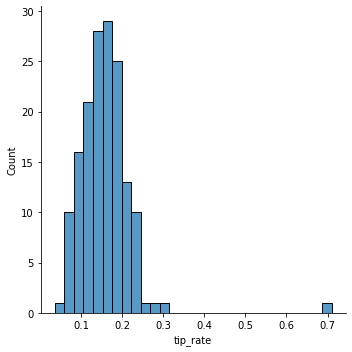

In [54]:
sns.displot(male_tips)

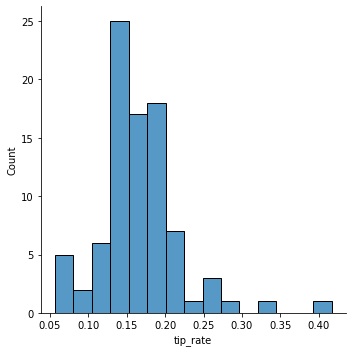

In [55]:
sns.displot(female_tips)

<AxesSubplot:xlabel='sex', ylabel='tip_rate'>

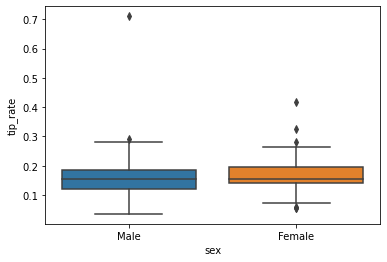

In [57]:
sns.boxplot(data=df, x='sex', y='tip_rate')

!["平均値差の検定"](平均値差の検定.png)

## Section 13 正規性と等分散性の検定

- 母集団が正規分布かどうか（シャピロウィルク検定）
- 母集団が等分散かどうか（F検定）

### シャピロウィルク検定

- 帰無仮説: **母集団が正規分布に従う** (←棄却を狙っていない）
  → 棄却できなかったら採択する？正規分布に従うという仮説を否定できなかった（正規分布に従うと言い切れる訳ではない）
- 対立仮説: 母集団が正規分布に従わない

### Q-Q Plot

- Quantile - Quantile プロット（quantile: 分位数）
- 標準正規分布の累積密度関数(CDF)を理論分布としてxに置く。これと観測した分布を視覚的に比較する。

In [82]:
male_tipr = df[df['sex']=='Male']['tip_rate']
female_tipr = df[df['sex']=='Female']['tip_rate']

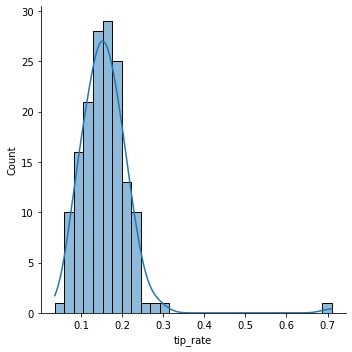

In [84]:
sns.displot(male_tipr, kde=True)

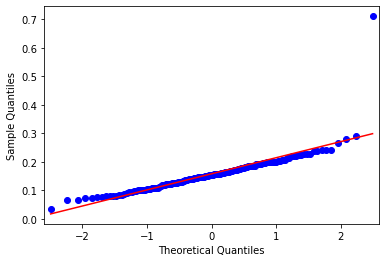

In [74]:
fig = qqplot(male_tipr, line='r')

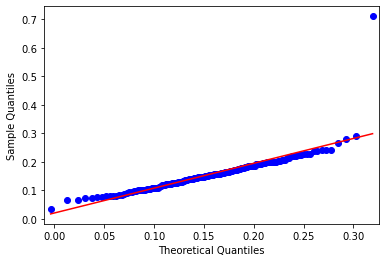

In [79]:
fig = qqplot(male_tipr, line='r', 
            dist=stats.norm(loc=np.mean(male_tipr), 
                            scale=np.sqrt(stats.tvar(male_tipr))))

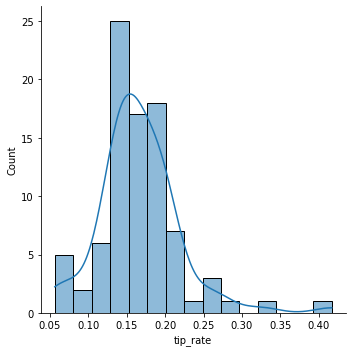

In [83]:
sns.displot(female_tipr, kde=True)

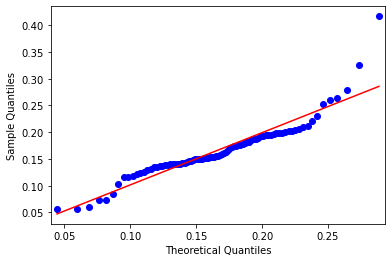

In [85]:
fig = qqplot(female_tipr, line='r', 
            dist=stats.norm(loc=np.mean(female_tipr), 
                            scale=np.sqrt(stats.tvar(female_tipr))))

統計検定量 W

$$
W = \frac{(\sum_{i=1}^n a_i x_i)^2}{\sum_{i=1}^n (x_i - \bar{x})^2} 
$$

### シャピロウィルク検定

In [86]:
stats.shapiro(male_tipr)

ShapiroResult(statistic=0.7447847127914429, pvalue=3.2243281107541917e-15)

In [87]:
stats.shapiro(female_tipr)

ShapiroResult(statistic=0.8982974290847778, pvalue=4.717996489489451e-06)

男女とも、p<0.05以下なので、帰無仮説を棄却できる。  
シャピロウィルクの帰無仮説は、**母集団が正規分布に従う** (←棄却を狙っていない）  
→このデータセットは正規分布からのデータではないと結論される。

In [91]:
# np.sort(male_tipr)

In [95]:
# np.sort(male_tipr)[:-1] 外れ値除去
stats.shapiro(np.sort(male_tipr)[:-1])

ShapiroResult(statistic=0.9931070804595947, pvalue=0.6644759774208069)

In [97]:
stats.shapiro(np.sort(female_tipr)[:-2])

ShapiroResult(statistic=0.9696651697158813, pvalue=0.04252713546156883)

外れ値除去すると、男性はp値が大きくなり、帰無仮説を棄却できない  
正規分布に従うという仮説を否定できなかった


### F検定

- 2群の等分散性の検定には、分散の比率を検定統計量に使う
-　分散の比率も一つの確率変数になる
- 帰無仮説: 分散に差がない
- 対立仮説: 分散に差がある

$$
F = \frac{s_1^{'2}}{s_2^{'2}}
$$

分散の比率の標本分布: F分布

- よく得られる値: 帰無仮説（分散に差がない）は正しそう
- 滅多に得られない値(棄却域) 帰無仮説は間違っている？（分散に差がある？）

F分布

- F分布は $x^2$ (観測度数が期待度数からどれくらい離れているかを計算)を使って表せる
    -X^2とは:  (観測度数-期待度数)^2/期待度数の総和
    - または、偏差の平方話を分散で割った値
- 平均 $\mu$, 分散 $\sigma^2$ から n個($x_1, x_2, ... x_n$)取り出す

$$
F = \frac{s_1^{'2}}{s_2^{'2}}=\frac{\frac{1}{n_1-1}x_1^2 \sigma_1^2}{\frac{1}{n_2-1}x_1^2 \sigma_2^2} = \frac{\frac{1}{n_1-1}x_1^2}{\frac{1}{n_2-1}x_1^2}
$$

- 自由度は二つある $n_1-1$と$n_2-1$
- 大きい方の不偏分散を分子にするため、F値は1以上になる
- p値はFより大きい方のF分布の面積
- 棄却域に入るかどうか

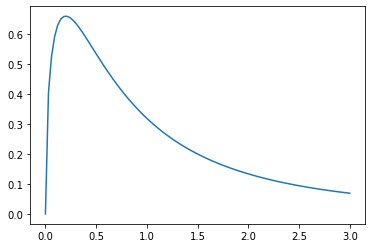

In [103]:
# stats.f(dfn, dfd) # dfn: 分子の自由度、dfd: 分母の自由度
x = np.linspace(0,3,100)
y = stats.f(3,3).pdf(x) # 自由度 3, 3のF分布
plt.plot(x,y)

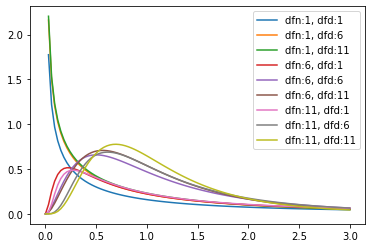

In [105]:
for dfn in range(1, 12, 5):
    for dfd in range(1, 12, 5):
        y = stats.f.pdf(x, dfn=dfn, dfd=dfd)
        plt.plot(x,y, label=f'dfn:{dfn}, dfd:{dfd}')
plt.legend()

In [106]:
print(np.var(male_tipr))

0.004169445577529407


In [107]:
print(np.var(female_tipr))

0.0028433004255488206


In [108]:
var1 = stats.tvar(male_tipr)
var2 = stats.tvar(female_tipr)
n1 = len(male_tipr)
n2 = len(female_tipr)

In [109]:
dfn = n1 -1
dfd = n2 -1

In [111]:
f = var1/var2
print(f)

1.4588472200534603


In [115]:
# Fの右側の面積をsfメソッドで求める
stats.f(dfn=dfn, dfd=dfd).sf(f)

0.027100863454374447

p<0.05 となり、帰無仮説（分散に差がない）を棄却して、分散に差があると結論できる  
よって、これらの平均差の検定には、スチューデントのt検定(等分散であることが前提）ではなく、ウェルチのt検定（等分散でなくても使える）を実施するべき。

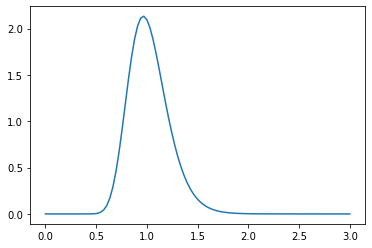

In [116]:
x = np.linspace(0,3,100)
y = stats.f(dfn=dfn, dfd=dfd).pdf(x)
plt.plot(x,y)

## Section 14 対応ありの平均値差の検定(t検定）



- 対応なしの場合: それぞれの母集団の平均を見る
- 対応ありの場合: 個々のデータの変化量dを1つの標本として見て、その平均を見る。変化量の母集団からとってきた標本の平均 $\bar{d}$ として確認する
-　平均 $\mu_d$, 分散 $\frac{\sigma_d^2 }{n}$
  - ただし $\mu_d$は変化量の母集団の平均、$\frac{\sigma_d^2 }{n}$は分散
- 標準化する

$$
z = \frac{\bar{d} - \mu_d}{\frac{\sigma_d}{\sqrt{n}}}
$$

- $ \sigma_d^2 $は不明なので、標本の変化量($\bar{d}$)の不偏分散の平方根 s' を使う。

$$
t = \frac{\bar{d} - \mu_d}{\frac{s_d^{'}}{\sqrt{n}}}
$$

- 帰無仮説は $\mu_d = 0$ (差はない)であるため

$$
t = \frac{\bar{d}}{\frac{s_d^{'}}{\sqrt{n}}}
$$

ここから、自由度n-1のt分布を求める(有意水準<.05は1.96ではない（裾野が標準正規分布よりも広いため）


### 対応ありの平均値差の検定

In [119]:
# stats.ttest_ind(a,b) 対応なし
# stats.ttest_rel(a,b) 対応あり　
# a,bのペアは同じ順番になっていること

In [124]:
bp_df = pd.read_csv("./data/blood_pressure.csv")

In [126]:
bp_df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [127]:
a = bp_df['bp_before']
b = bp_df['bp_after']
# 　両側検定
stats.ttest_rel(a,b)

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

pvalue <.05であるため、差がないという帰無仮説は棄却される。よって、前後で差はあるといえる

In [132]:
# 片側検定 aよりもbが小さいことを確認する
# 片側検定の場合も結論は↑と同様。
stats.ttest_rel(a,b, alternative='greater')

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)

In [129]:
bp_df['delta'] = bp_df['bp_before'] - bp_df['bp_after']
bp_df['delta'].mean()

5.091666666666667

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delta'>

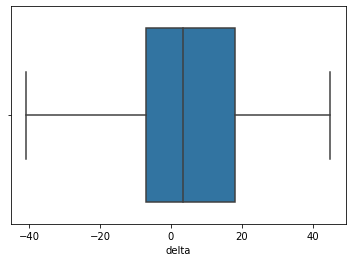

In [130]:
sns.boxplot(bp_df['delta'])

右側にbox plotが寄っている (beforeの方がafterよりも大きいがち)

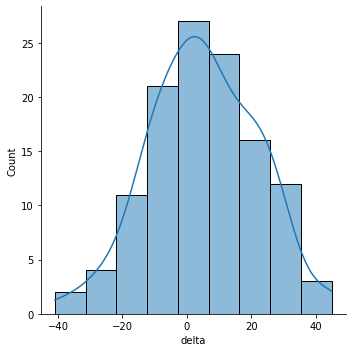

In [131]:
sns.displot(bp_df['delta'], kde=True)